In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [31]:
img = cv2.imread("./img/jpeg/im1.jpeg")

In [32]:
# downscale image
times = 8
img = cv2.resize(img, (img.shape[1] // times, img.shape[0] // times))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

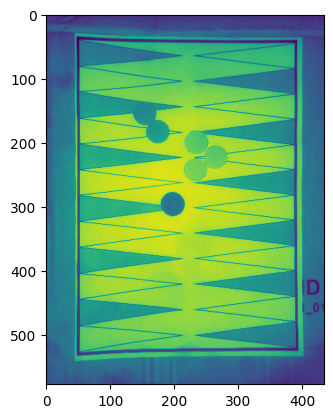

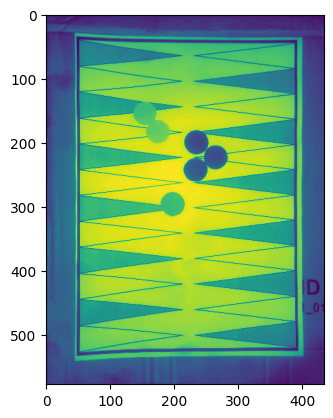

In [33]:
b, g, r = cv2.split(img)
# show the red and green channels
plt.figure()
plt.imshow(r)
plt.figure()
plt.imshow(g)

In [34]:
# subtract the green channel from the red channel
result = np.zeros((g.shape[0], g.shape[1]), dtype="uint8")
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        val1 = r[i][j].astype("int8")
        val2 = g[i][j].astype("int8")
        res = val1 - val2
        # make sure the value is not negative
        if res < 0:
            result[i][j] = 0
        else:
            result[i][j] = res

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24012\155906126.py:7: RuntimeWarning: overflow encountered in scalar subtract
  res = val1 - val2


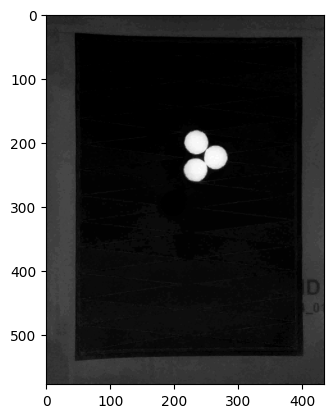

In [35]:
plt.imshow(result, cmap="gray")

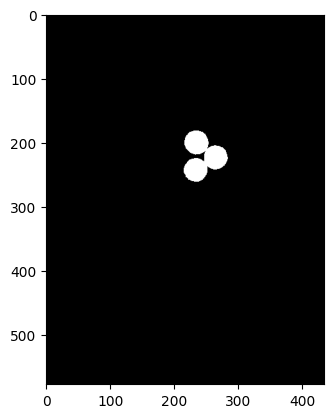

In [36]:
thresholded = cv2.threshold(result, 30, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresholded, cmap="gray")

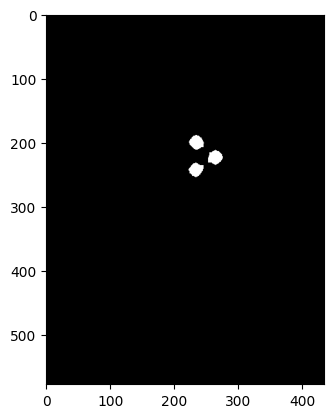

In [37]:
# erode the image
eroded = cv2.erode(thresholded, None, iterations=6)
plt.imshow(eroded, cmap="gray")

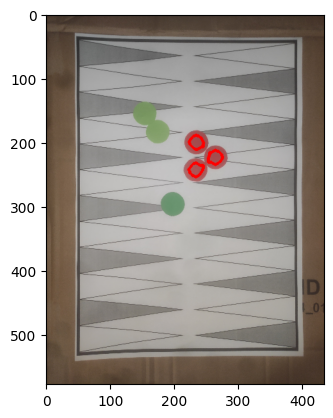

In [40]:
# gray_image = cv2.cvtColor(thresholded_image_after, cv2.COLOR_BGR2GRAY)
# _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_with_contours = cv2.drawContours(img_rgb, contours, -1, (255, 0, 0), 3)

plt.imshow(img_with_contours)